# Exercises for Chapter 3

----------

*Most exercises below are adapted from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).*

## Support Vector Machines

The following questions test your ability to implement SVM classifiers and reason about their effectiveness.

(a) Generate a simulated two-class data set with 100 observations and two features in which there is a visible but nonlinear separation between the two classes.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


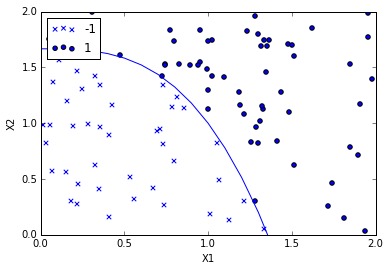

In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


# Generate observations on the interval [0, 1) 
x1 = np.random.uniform(low=0.0, high=2.0, size=100)
x2 = np.random.uniform(low=0.0, high=2.0, size=100)
X = np.matrix([x1, x2]).T

# Assign class labels based on the decision surface 2x1^3 + 3x2 = 5
y = np.where(((2 * (x1 ** 3)) + (3 * x2) >= 5), 1, -1)

# Plot the decision boundary
dec_x = np.arange(0, 2, 0.1)
dec_y = (5 - (2 *(dec_x ** 3))) / 3
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 2.0)
plt.xlabel('X1')
plt.ylim(0.0, 2.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

(b) Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data.

In [2]:
from sklearn import svm

# Instantiate the three classifiers
linear = svm.SVC(kernel='linear')
radial = svm.SVC(kernel='rbf')
poly_2 = svm.SVC(kernel='poly', degree=2)
poly_3 = svm.SVC(kernel='poly', degree=3)
classifiers = [linear, radial, poly_2, poly_3]
names = ['linear', 'radial', 'degree 2 polynomial', 'degree 3 polynomial']

# Fit classifiers to the training data and calculate accuracy
for name, classifier in zip(names, classifiers):
    classifier.fit(X, y)
    score = classifier.score(X, y)
    print('''The {name} classifier has a mean accuracy of {score} \
on the training data.'''.format(name=name, score=str(int(score*100)) + '%'))

print()
print('''Hence, the polynomial and radial kernels out-perform the linear classifier.''')

The linear classifier has a mean accuracy of 93% on the training data.
The radial classifier has a mean accuracy of 95% on the training data.
The degree 2 polynomial classifier has a mean accuracy of 96% on the training data.
The degree 3 polynomial classifier has a mean accuracy of 97% on the training data.

Hence, the polynomial and radial kernels out-perform the linear classifier.


(c) Generate 1000 test observations through the same method that you used in (a).

In [3]:
# Generate observations on the interval [0, 1) 
x1_test = np.random.uniform(low=0.0, high=2.0, size=1000)
x2_test = np.random.uniform(low=0.0, high=2.0, size=1000)
X_test = np.matrix([x1_test, x2_test]).T

# Assign class labels based on the decision surface 2x1^3 + 3x2 = 5
y_test = np.where(((2 * (x1_test ** 3)) + (3 * x2_test) >= 5), 1, -1)

(d) Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


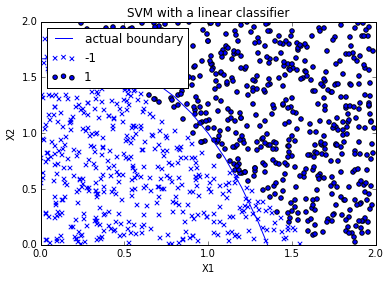

Training error for the linear classifier: 7.0%
Testing error for the linear classifier: 6.9%


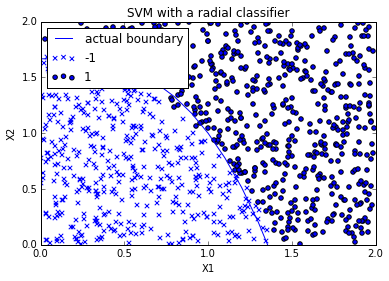

Training error for the radial classifier: 5.0%
Testing error for the radial classifier: 2.5%


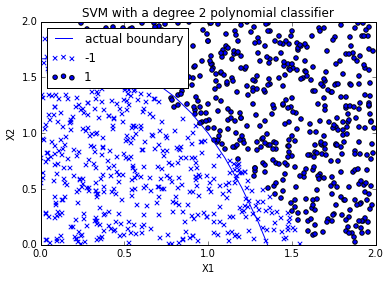

Training error for the degree 2 polynomial classifier: 4.0%
Testing error for the degree 2 polynomial classifier: 6.7%


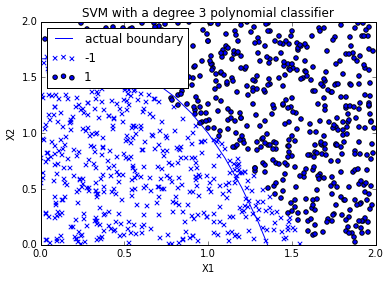

Training error for the degree 3 polynomial classifier: 3.0%
Testing error for the degree 3 polynomial classifier: 6.6%


In [4]:
for name, classifier in zip(names, classifiers):
    # Predict training and test data
    pred_train = classifier.predict(X)
    pred_test = classifier.predict(X_test)
    
    # Calculate error rates for training and test data
    err_train = np.sum(np.where(pred_train != y, 1, 0)) / len(pred_train)
    err_test = np.sum(np.where(pred_test != y_test, 1, 0)) / len(pred_test)

    # Plot results
    plt.plot(dec_x, dec_y, label='actual boundary')
    markers = ('x', 'o')
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(X_test[pred_test == cl, 0], X_test[pred_test == cl, 1],
                    marker=markers[idx], label=cl)

    plt.xlim(0.0, 2.0)
    plt.xlabel('X1')
    plt.ylim(0.0, 2.0)
    plt.ylabel('X2')
    plt.legend(loc='upper left')
    plt.title('SVM with a {name} classifier'.format(name=name))
    plt.show()
    plt.close()
    
    # Print results
    print('''Training error for the {name} classifier: {err}'''.format(
            name=name, err=str(err_train*100) + '%'))
    print('''Testing error for the {name} classifier: {err}'''.format(
            name=name, err=str(err_test*100) + '%'))
    
    

As we can see in the error reports and plots above, the radial and polynomial classifiers perform equally well on the test data within 0.5% error. The polynomial classifier with degree 3 performs the best in most iterations of this experiment, as we would expect given the actual underlying decision boundary.

--------------

## Logistic regression

We have seen that we can fit an SVM with a nonlinear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [5]:
# Generate random training data
x1 = np.random.uniform(low=0.0, high=10.0, size=500)
x2 = np.random.uniform(low=0.0, high=10.0, size=500)
X = np.matrix([x1, x2]).T
y = np.where(0.15 * (x1 ** 2) - x2 > 0, 1, 0)

(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y-axis.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


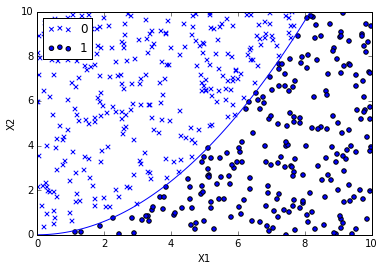

In [6]:
import math

# Plot the decision boundary
dec_x = np.arange(0, 10, 0.1)
dec_y = 0.15 * (dec_x ** 2)
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1],
                marker=markers[idx], label=cl)
    
plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [7]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


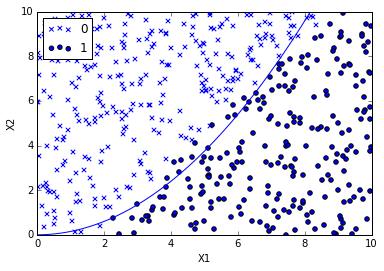

In [8]:
y_pred = logistic.predict(X)

# Plot the decision boundary
dec_x = np.arange(0, 10, 0.1)
dec_y = 0.15 * (dec_x ** 2)
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)
    
plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X12, X1 ×X2, log(X2), and so forth).

In [9]:
logistic_sqd = LogisticRegression()
X_sqd = np.matrix([0.15 * (x1**2), x2]).T

logistic_sqd.fit(X_sqd, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


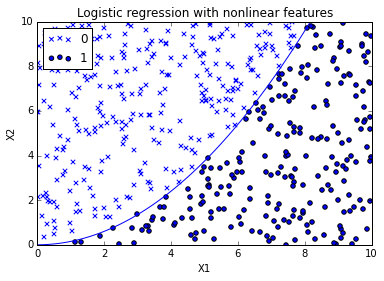

In [10]:
y_pred = logistic_sqd.predict(X_sqd)
plt.plot(dec_x, dec_y)
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Logistic regression with nonlinear features')
plt.show()
plt.close()

(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


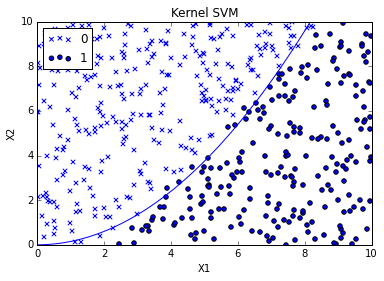

In [11]:
svc = svm.SVC(kernel='linear')
svc.fit(X, y)

y_pred = svc.predict(X)
plt.plot(dec_x, dec_y)
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Kernel SVM')
plt.show()
plt.close()

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


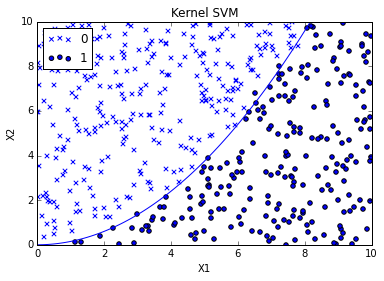

In [12]:
svc = svm.SVC(kernel='rbf')
svc.fit(X, y)

y_pred = svc.predict(X)
plt.plot(dec_x, dec_y)
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Kernel SVM')
plt.show()
plt.close()

(i) Comment on your results.

Seems like logistic regression with nonlinear training data performs just as well, if not better, than the kernelized SVM! This makes some sense – the nonlinear logistic regression classifier, after all, is in this case fit to transformed training data that exactly models the relationship underlying the data ($x_{2} = 0.15 \cdot x_{1}^{2}$). If we didn't know the underlying relationship and had to guess at the degree and shape of the polynomial, accurately transforming the training data would probably be much more difficult.

--------

Prove algebraically that the logistic and logit representations of the logistic regression model are equivalent. More specifically, prove that:

$$ p(X) = \frac{1}{1 + e^{-z}} \quad \Leftrightarrow \quad log(\frac{p(X)}{1-p(X)}) = z $$

Given:

$$ p(X) = \frac{1}{1 + e^{-z}} $$

It follows by algebra that:

$$\begin{gathered}
(1 + e^{-z}) \cdot p(X) = 1 \\
\\
p(X) + p(X) \cdot e^{-z} = 1 \\
\\
p(X) \cdot e^{-z} = 1 - p(X) \\
\\
e^{-z} = \frac{1 - p(X)}{p(X)} \\
\\
e^{z} = \frac{p(X)}{1 - p(X)} \\
\\
ln(e^{z}) = ln(\frac{p(X)}{1 - p(X)}) \\
\\
z = ln(\frac{p(X)}{1 - p(X)}) \quad \square
\end{gathered}$$

--------

Comprehension questions about **odds**:

(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?

If the odds are 0.37 that a person will default on their credit card payment, then we can say that:

$$\begin{gathered}
\frac{p(default)}{1 - p(default)} = 0.37 \\
\\
0.37 - 0.37 \cdot p(default) = p(default) \\
\\
0.37 = 1.37 \cdot p(default) \\
\\
p(default) = \frac{0.37}{1.37} = 27\% \\
\end{gathered}$$

(b) Suppose that an individual has a 16% chance of defaulting on their credit card payment. What are the odds that they will default?

By the definition of odds:

$$\begin{gathered}
odds = \frac{p(default)}{1 - p(default)} \\
\\
odds = \frac{0.16}{0.84} = 0.19 \\
\end{gathered}$$

--------

Suppose we collect data for a group of students in a statistics class with variables $x_{1}$ = hours studied, $x_{2}$ = undergrad GPA, and $y$ = receive an A. We fit a logistic regression and produce estimated coefficients $w_{0} = -6$, $w_{1} = 0.05$, and $w_{2} = 1$.

(a) Estimate the probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class.

The probability of a class label given data, $p(y \mid X; w)$, under the logistic regression model is given by:

$$ p(X) = \frac{1}{1 + e^{-z}} $$

In this case, $z = w_{0} + w_{1}x_{1} + w_{2}x_{2} = -6 + 0.05 \cdot (40) + 3.5 = -0.5$, so:

$$ p(X) = \frac{1}{1 + e^{0.5}} = 0.378 $$

(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

We can interpret this question as a univariate equation in which we must solve for $x_{1}$:

$$\begin{gathered}
z = w_{0} + w_{1}x_{1} + w_{2}x_{2} = 0.05x_{1} - 2.5 \\
\\
0.5 = \frac{1}{1 + e^{2.5 - 0.05x_{1}}} \\
\\
0.5 + 0.5e^{2.5 - 0.05x_{1}} = 1 \\
\\
e^{2.5 - 0.05x_{1}} = 1 \\
\\
2.5 - 0.05x_{1} = ln(1) = 0 \\
\\
0.05x_{1} = 2.5 \\
\\
x_{1} = 50 \\
\end{gathered}$$

So, the student would have to study for 50 hours to have a 50% chance of getting an A.

------------------

## K-Nearest Neighbors

An exercise to help investigate the curse of dimensionality in nearest-neighbor algorithms:

(a) Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly distributed on $[0,1]$. Each observation $X^{(i)}$ is associated with a response value $y^{(i)}$. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range $[0.55, 0.65]$. On average, what fraction of the available observations will we use to make the prediction?

**Answer:** Since $X$ is uniformly distributed on $[0, 1]$, observations that are within 10% of the range of any given $X^{(i)}$ represent on average 10% of the available observations.

(b) Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_{1}$ and $X_{2}$. We assume that ($X_{1}$, $X_{2}$) are uniformly distributed on $[0,1] × [0,1]$. We wish to predict a test observation’s response using only observations that are within 10% of the range of $X_{1}$ and within 10% of the range of $X_{2}$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_{1} = 0.6$ and $X_{2} = 0.35$, we will use observations in the range $[0.55, 0.65]$ for $X_{1}$ and in the range $[0.3, 0.4]$ for $X_{2}$. On average, what fraction of the available observations will we use to make the prediction?

**Answer**: Since $X_{1}$ and $X_{2}$ are both uniformly distributed on $[0, 1]$ we can apply the same logic as in question (a) and reason that on average, we will consider 10% of the available observations to make our prediction for each variable. But since we must perform this narrowing for *both variables*, the fractions are multiplicative: in the case of two variables combined, we actually consider $10\% \cdot 10\% = 1\%$ of the available observations.

To see why the effect of considering two variables would be multiplicative, think of the relevant range of each variable as its own random variable (i.e. it maps an observation to a range of values within 10% of that observation). We'll define the range of $X_{1}$ to be the random variable $A$, and the range of $X_{2}$ to be the random variable $B$. Then, the set of observations taht we care about can be represented by the *intersection of our events*, $A \cap B$. Hence, since the random variables are independent (according to our assumption that they're uniformly distributed):

$$ A \cap B = A \cdot B $$

so the ranges are multiplicative.

(c) Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

**Answer**: Let $S$ be the set corresponding to our relevant observations, and $A_{p}$ be the event corresponding to the range of relevant observations for the feature $X_{p}$. It follows from the reasoning in (b) that:

$$\begin{gathered}
S = A_{1} \; \cap \; A_{2} \; \cap \; ... \; \cap \; A_{p} \\
\\
S = \bigcap_{p} A_{p} \\
\end{gathered}$$

Or in this case:

$$ S = A_{1} \; \cap \; A_{2} \; \cap \; ... \; \cap \; A_{100} $$

And since all events $A_{p}$ represent the same range (10%), we can easily determine the total fraction of relevant observations, $S_{frac}$:

$$ S_{frac} = A_{frac}^{p} = 0.1^{100} = 1 \cdot 10^{-100} $$

(d) Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations “near” any given test observation.

**Answer**: By the reasoning in part (c), we can see that the set of relevant training observations shrinks exponentially according to $p$ (at least in this particular case, where the random variables that represent our dataset's features are independent). Hence, as $p$ gets large, the probability that we'll have *any* neighbors to considers approaches 0!

(e) Now suppose that we wish to make a prediction for a test observation by creating a $p$-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1$, $p = 2$, and $p = 100$, what is the length of each side of the hypercube? Comment on your answer.

*Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment; when $p = 2$ it is a square; and when $p = 100$ it is a 100-dimensional cube.*

**Answer**: We can interpret the statement that the hypercube must "contain, on average, 10% of the training observations" to mean that the volume of the hypercube should be 10% the volume of the dataset, or:

$$ Volume_{hypercube} = \frac{Volume_{sample space}}{10} $$

Since the volume of a hypercube is $s^{p}$, where $s$ is the length of a side and $p$ is the number of dimensions, it follows that:

$$ s^{p} = \frac{S^{p}}{10} $$

Where $S$ is the length of a dimension of the sample space. Further, since each dimension has length 1 (since we're sampling on the interval $[0, 1]$):

$$\begin{gathered}
s^{p} = \frac{1^{p}}{10} = \frac{1}{10} \\
\\
p \cdot log(s) = log(\frac{1}{10}) = -1 \\
\\
log(s) = -\frac{1}{p} \\
\\
s = 10^{-\frac{1}{p}} = \frac{1}{\sqrt[p]10} \\
\end{gathered}$$

-------

## Decision trees

Consider the Gini index, classification error, and entropy measures of impurity in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $p(i \mid t)$. The x- axis should display $p(i \mid t)$, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.

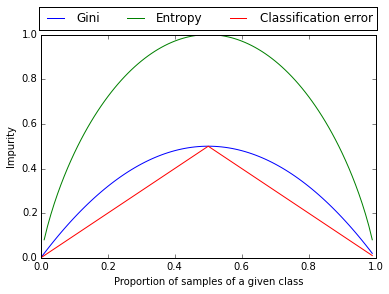

In [13]:
def gini(px):
    return (px * (1 - px)) + ((1 - px) * (1 - (1 - px)))

def entropy(px):
    return -(px * np.log2(px)) - ((1 - px) * np.log2(1 - px))

def class_error(px):
    return 1 - max([px, 1 - px])

x = np.arange(0, 1, 0.01)
classes = np.unique(y)
I_G = [gini(px) for px in x]
I_H = [entropy(px) if px != 0 else None for px in x]
I_E = [class_error(px) for px in x]

plt.plot(x, I_G, label='Gini')
plt.plot(x, I_H, label='Entropy')
plt.plot(x, I_E, label='Classification error')
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15))
plt.xlabel('Proportion of samples of a given class')
plt.ylabel('Impurity')
plt.show()
plt.close()

--------

This problem tests your ability to train decision trees and reason about their effectiveness. It uses the built-in breast cancer dataset that ships with scikit-learn. You can import this dataset through the module method `sklearn.datasets.load_breast_cancer`.

(a) Import the breast cancer dataset from scikit-learn. Then, create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
data, target = breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


(b) Fit a decision tree to the training data, with `Purchase` as the response and all other variables except for `Buy` as predictors. Produce summary statistics about the tree and describe the results obtained. What is the training error rate?

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
score = accuracy_score(dtree.predict(X_train), y_train)

print('The accuracy of the decision tree is {score} on the training set.'.format(score=score))

The accuracy of the decision tree is 1.0 on the training set.


0.63736263736263732

(c) Type in the name of the tree object in order to get a detailed text output.

In [19]:
print(dtree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


(d) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [29]:
from sklearn.metrics import confusion_matrix

pred = dtree.predict(X_test)
confusion = confusion_matrix(pred, y_test)
accuracy = round(accuracy_score(pred, y_test), 3)

print('The classifier has an accuracy of {score} on the test data.'.format(score=accuracy))
print('Confusion matrix:')
print()
print(confusion)

The classifier has an accuracy of 0.904 on the test data.
Confusion matrix:

[[45  9]
 [ 2 58]]


(e) Apply a cross-validation function to the training set in order to determine the optimal tree size.

In [36]:
scores = []
for i in range(1, 10):
    cv_tree = DecisionTreeClassifier(max_depth=i)
    cv_tree.fit(X_train, y_train)
    scores.append(accuracy_score(cv_tree.predict(X_test), y_test))
    
highest_score = (0, 0)
for index, score in enumerate(scores):
    if score > highest_score[1]:
        highest_score = (index+1, score)
        
output = 'The highest score, {score}, occurs in a tree with node size {size}.'

print(output.format(score=round(highest_score[1], 3), size=highest_score[0]))
        

The highest score, 0.965, occurs in a tree with node size 2.


(f) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

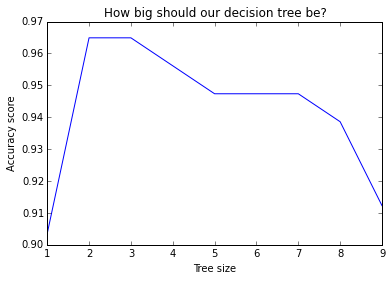

In [37]:
plt.plot(np.arange(1,10), scores)
plt.xlabel('Tree size')
plt.ylabel('Accuracy score')
plt.title('How big should our decision tree be?')
plt.show()
plt.close()

(g) Which tree size corresponds to the lowest cross-validated classification error rate?

** Answer:** Trees of size 2 and 3 perform equally well, with the lowest cross-validated classification error.

(h) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [38]:
optimal_tree = DecisionTreeClassifier(max_depth=3)
optimal_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

(i) Compare the training error rates between the pruned and un-pruned trees. Which is higher?

In [39]:
prune_acc_train = round(accuracy_score(optimal_tree.predict(X_train), y_train), 3)
noprune_acc_train = round(accuracy_score(dtree.predict(X_train), y_train), 3)

print('The pruned tree has an accuracy score of {score} on training data.'.format(score=prune_acc_train))
print('The un-pruned tree has an accuracy score of {score} on training data.'.format(score=noprune_acc_train))

The pruned tree has an accuracy score of 0.971 on training data.
The un-pruned tree has an accuracy score of 1.0 on training data.


(j) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [40]:
prune_acc_test = round(accuracy_score(optimal_tree.predict(X_test), y_test), 3)
noprune_acc_test = round(accuracy_score(dtree.predict(X_test), y_test), 3)

print('The pruned tree has an accuracy score of {score} on test data.'.format(score=prune_acc_test))
print('The un-pruned tree has an accuracy score of {score} on test data.'.format(score=noprune_acc_test))

The pruned tree has an accuracy score of 0.965 on test data.
The un-pruned tree has an accuracy score of 0.904 on test data.


(k) Comment on your results.

**Answer:** Decision trees are very prone to overfitting! Our non-pruned model performs perfectly on training data (100% accuracy), but doesn't generalize very well to new samples (~90% accuracy). Our pruned model, on the other hand, does worse on the training data, but far better on test data (around 97% accuracy in both cases). 

Turns out, we don't always want to perfectly maximize information gain on the training data when building a decision tree. Instead, it pays to cross-validate and prune the tree to a size that generalizes better. (Or better yet, to use a random forest!)